Performing gradient descent...


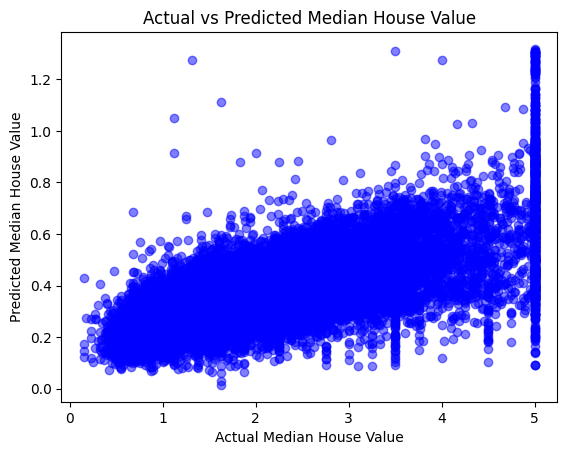

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt

# Fetch California housing data
data = pd.DataFrame(fetch_california_housing(as_frame=True).frame)
data.head()

# Function for Gradient Descent
def gradient_descent(data, learning_rate=0.001, iterations=100):
    # Outcome we want to predict (assuming the last column is the target)
    y = data.iloc[:, 8].values

    # Set up the inputs (first 8 columns as features) and standardize
    X = data.iloc[:, 0:8].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize coefficients and bias
    m = np.zeros(X_scaled.shape[1])  # Array to hold coefficients for 8 features
    b = 0  # Bias
    n = len(y)  # Number of data points

    # Gradient Descent Loop
    for _ in range(iterations):
        # Prediction
        y_predicted = np.dot(X_scaled, m) + b

        # Error calculation (Mean Squared Error)
        error = (1/n) * np.mean((y_predicted - y) ** 2)

        # Gradients for coefficients (m) and bias (b)
        dm = (-2/n) * np.dot(X_scaled.T, (y - y_predicted))  # Gradient for coefficients
        db = (-2/n) * np.sum(y - y_predicted)            # Gradient for bias

        # Update the coefficients and bias
        m -= learning_rate * dm
        b -= learning_rate * db

    return m, b, y_predicted

print("Performing gradient descent...")

# Run gradient descent
m, b, y_predicted = gradient_descent(data, learning_rate=0.001, iterations=100)

# Plot Actual vs Predicted values
y_actual = data.iloc[:, 8].values
plt.scatter(y_actual, y_predicted, color='blue', alpha=0.5)
plt.title("Actual vs Predicted Median House Value")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.show()
